In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Project.csv')

df['Height']=np.random.randint(150,181,size=len(df))

df.to_csv('Project.csv',index=False)
print(df)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     170     180   
1      Jae Crowder  Boston Celtics      99       SF   25     172     235   
2     John Holland  Boston Celtics      30       SG   27     170     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     179     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     150     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     168     203   
454      Raul Neto       Utah Jazz      25       PG   24     172     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     154     256   
456    Jeff Withey       Utah Jazz      24        C   26     150     231   
457       Priyanka       Utah Jazz      34        C   25     164     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [5]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,172,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,179,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,172,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,154,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,150,231,Kansas,947276.0


In [17]:
#1

distribution=df['Team'].value_counts()

total_employees=len(df)

split_percentage=(distribution/total_employees)*100

distribution_df=pd.DataFrame({
    'count':distribution,
    'percentage':split_percentage
})

print(distribution_df)

                        count  percentage
Team                                     
New Orleans Pelicans       19    4.148472
Memphis Grizzlies          18    3.930131
Utah Jazz                  16    3.493450
New York Knicks            16    3.493450
Milwaukee Bucks            16    3.493450
Brooklyn Nets              15    3.275109
Portland Trail Blazers     15    3.275109
Oklahoma City Thunder      15    3.275109
Denver Nuggets             15    3.275109
Washington Wizards         15    3.275109
Miami Heat                 15    3.275109
Charlotte Hornets          15    3.275109
Atlanta Hawks              15    3.275109
San Antonio Spurs          15    3.275109
Houston Rockets            15    3.275109
Boston Celtics             15    3.275109
Indiana Pacers             15    3.275109
Detroit Pistons            15    3.275109
Cleveland Cavaliers        15    3.275109
Chicago Bulls              15    3.275109
Sacramento Kings           15    3.275109
Phoenix Suns               15    3

In [15]:
#2


position_group=df.groupby('Position')

for position , group in position_group:
   print(f"Position:{position}")



Position:C
Position:PF
Position:PG
Position:SF
Position:SG


In [27]:
#3


bins=[0,10,20,30,40,50,60]
labels=['0-10','11-20','21-30','31-40','41-50','51-60']

df['age_group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)

age_distribution=df['age_group'].value_counts().sort_index()

print(age_distribution)

age_group
0-10       0
11-20      2
21-30    334
31-40    119
41-50      3
51-60      0
Name: count, dtype: int64


In [29]:
#4

salary_exp=df.groupby(['Team','Position'])['Salary'].sum().reset_index()

high_salary_exp=salary_exp.loc[salary_exp['Salary'].idxmax()]

print("team with highest salary expenditure",high_salary_exp['Team'])
print("position with highest salary",high_salary_exp['Position'])
print("total salary expenditure",high_salary_exp['Salary'])

team with highest salary expenditure Los Angeles Lakers
position with highest salary SF
total salary expenditure 31866445.0


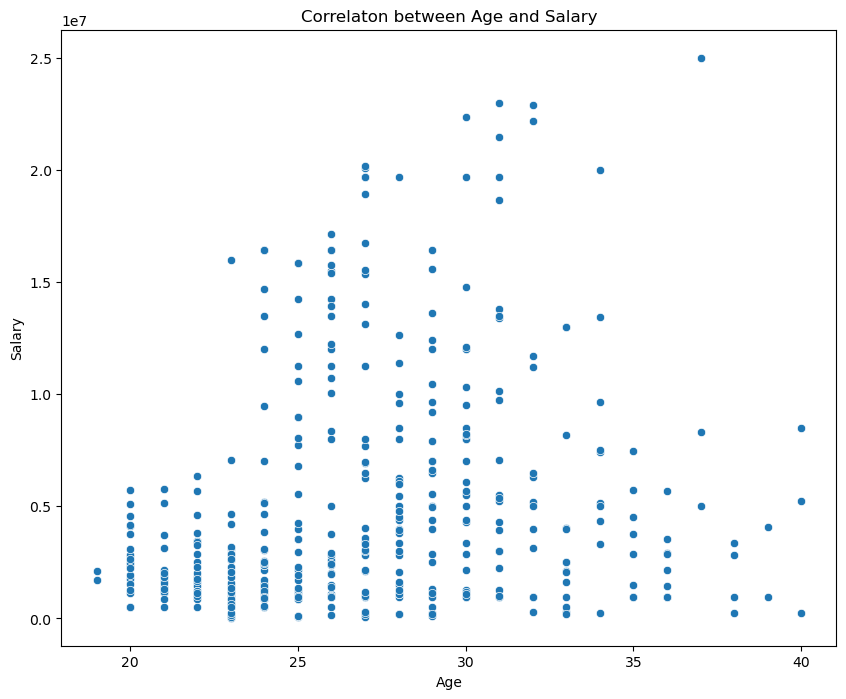

Correlation between Age and Salary:(0      25
1      25
2      27
3      22
4      29
       ..
453    26
454    24
455    26
456    26
457    25
Name: Age, Length: 458, dtype: int64, 0      7730337.0
1      6796117.0
2            NaN
3      1148640.0
4      5000000.0
         ...    
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
457     947276.0
Name: Salary, Length: 458, dtype: float64)


In [41]:
#5

#Scatterplot

plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Salary',data=df)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlaton between Age and Salary')

plt.show()

Correlation=df['Age'],(df['Salary'])

print(f"Correlation between Age and Salary:{Correlation}")

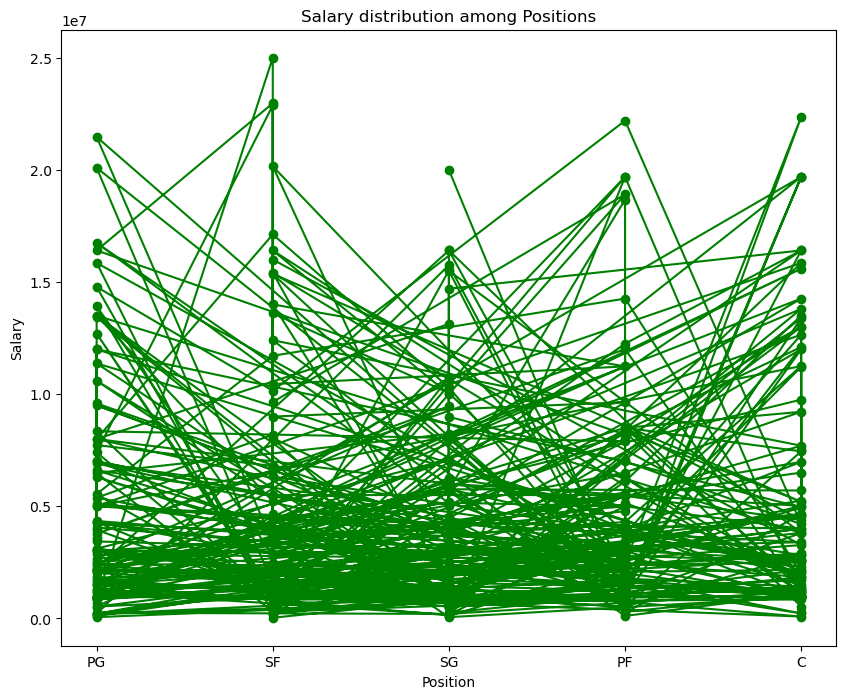

In [43]:
#Line Chart

plt.figure(figsize=(10,8))
plt.plot(df['Position'],df['Salary'],marker='o',linestyle='-',color='g')

plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary distribution among Positions')

plt.show()





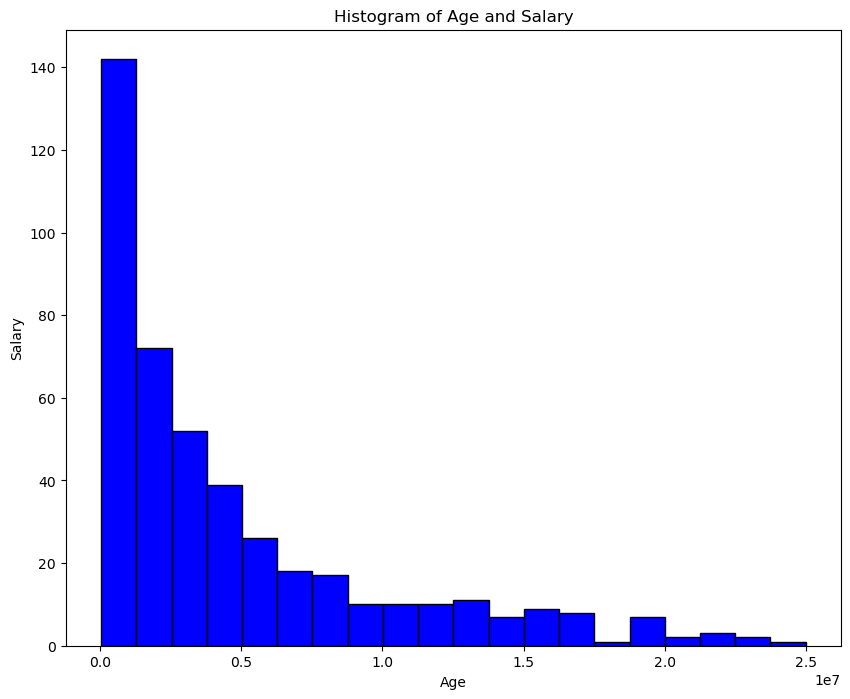

In [49]:
#Histogram

plt.figure(figsize=(10,8))
plt.hist(df['Salary'],bins=20,color='b',edgecolor='black')


plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Histogram of Age and Salary')

plt.show()


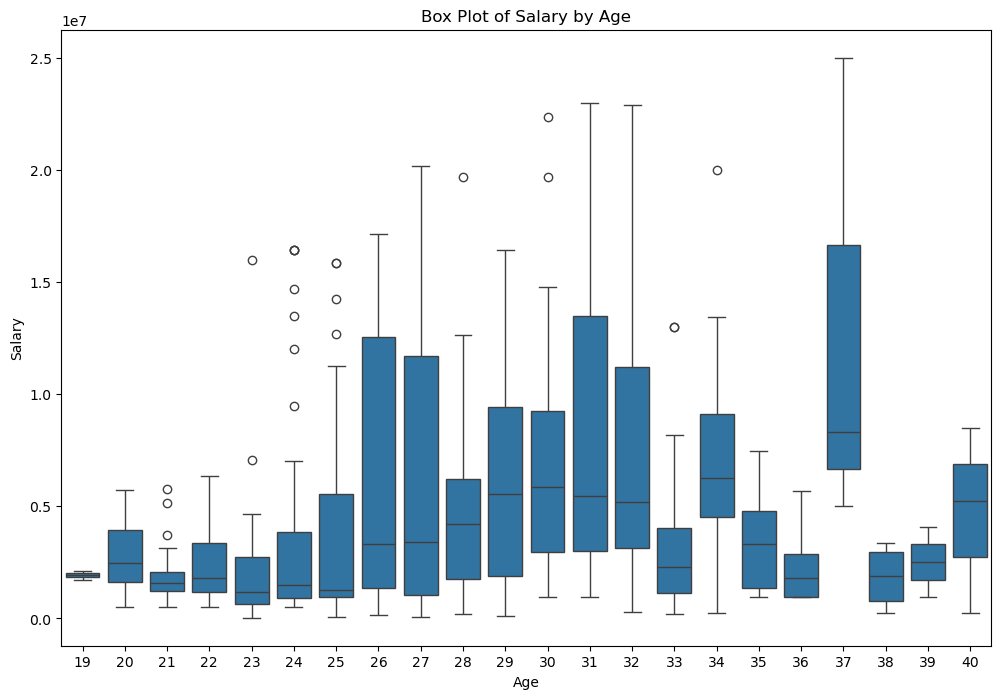

In [73]:
#Box Plot

plt.figure(figsize=(12,8))
sns.boxplot(x='Age',y='Salary',data=df)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Age')

plt.show()


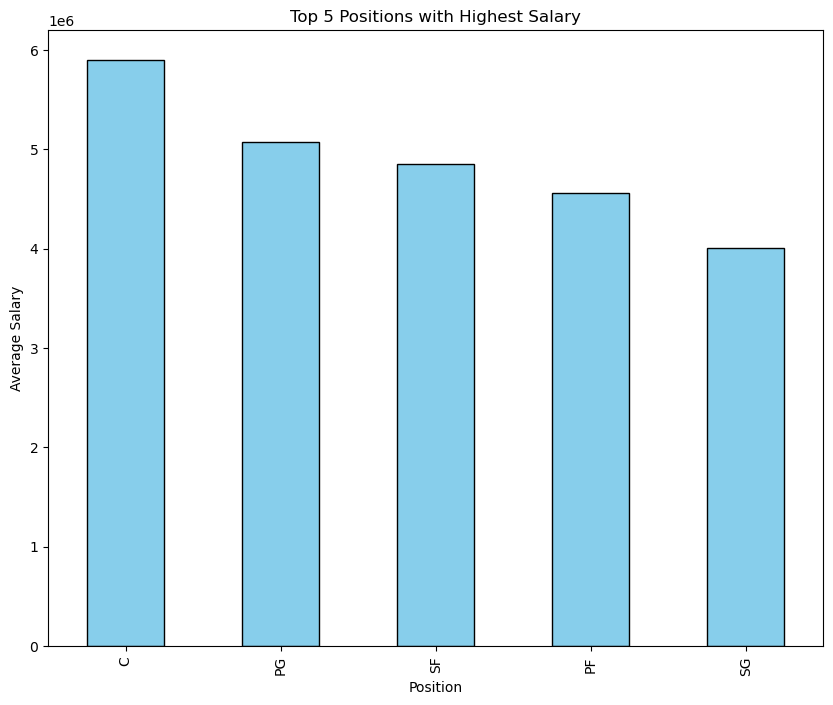

In [71]:
#Bar

position_salary=df.groupby('Position')['Salary'].mean().sort_values(ascending=False)

top_5_positions=position_salary.head(10)
plt.figure(figsize=(10,8))
top_5_positions.plot(kind='bar',color='skyblue',edgecolor='black')

plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Top 5 Positions with Highest Salary')

plt.show()